### Few Shot Learner Training, Support set and Testing Data Preperation

***
This Notebook is to generate training and testing set for **few shot learner**.   

For few shot learner, the final dataframe includes id, topics and texts. for the training set, topics under the 'commodity' category have been chosen.  For each topics, I will sample 10 to 50 datapoints. 

For few shot learner, the final dataframe is in the 'Commodity' category. In training set, for each topics, I will sample 10 to 50 datapoints.   
***
- Data Preprocessing
- Generate Topics and Categories Mapping
- Construct Category and Label
- Data Visualization
    - category distribution
    - topic distribution

In [106]:
import numpy as np
import pandas as pd

import json

In [6]:
# read data
reuters_bert_train = pd.read_csv('result/reuters_final_train.csv')
reuters_bert_test = pd.read_csv('result/reuters_final_test.csv')

reuters_bert_train.head()

,id,topics,texts
0,4005,interest,u.s. economic data key to debt futures outlook...
1,4005,retail,u.s. economic data key to debt futures outlook...
2,4005,ipi,u.s. economic data key to debt futures outlook...
3,4012,earn,bank of british columbia 1st qtr jan 31 netope...
4,4014,earn,restaurant associates inc <ra> 4th qtr jan 3sh...


In [13]:
## Read mapping data
with open('result/category_topic_mapping.json',"r") as f:
    mapping = json.load(f)


In [19]:
mapping.keys()

dict_keys(['money-fx', 'ship', 'interest', 'economic_indicator', 'currency', 'commodity', 'energy', 'acq', 'earn'])

## Training Data

In [101]:
def category_mapping(cat_top_map, topic):
    for key in cat_top_map:
        if topic in cat_top_map[key]:
            return key
        
def get_fewshot_train(df,category ='commodity',num=50):
    # add category
    df['category'] = df['topics'].apply(lambda x: category_mapping(mapping, x))
    
    # choose specific category and resample
    df = df[df['category'] == category].groupby('topics').head(num)

    # topics with one record
    temp = df.groupby('topics').count()
    topics = temp[temp['id']<10].index.tolist()
    
    # exclude topics with less then 10 records
    df = df[~df['topics'].isin(topics)]
    return df[['id','topics','texts']]



## Support Set

In [84]:
def add_single_category(cat_top_map, topic):
    for key in cat_top_map:
        if topic in cat_top_map[key]:
            return key

def get_fewshot_support(df,category ='commodity',num=1):
    # add category
    df['category'] = df['topics'].apply(lambda x: add_single_category(mapping, x))
    
    # choose specific category and resample
    df = df[df['category'] == category].groupby('topics').head(num)
    
    return df[['id','topics','texts']]



## Testing Data

In [102]:
def add_single_category(cat_top_map, topic):
    for key in cat_top_map:
        if topic in cat_top_map[key]:
            return key

def get_fewshot_test(df,category ='commodity'):
    # add category
    df['category'] = df['topics'].apply(lambda x: add_single_category(mapping, x))
    
    # choose specific category
    df = df[df['category'] == category]
    
    return df[['id','topics','texts']]

In [108]:
# commodity
fewshot__train = get_fewshot_train(reuters_bert_train)
fewshot_support = get_fewshot_support(reuters_bert_train)
fewshot_test = get_fewshot_test(reuters_bert_train)

print('The shape of training data is {}.'.format(fewshot_train.shape))
print('The shape of support set is {}.'.format(fewshot_support.shape))
print('The shape of test set is {}.'.format(fewshot_test.shape))
fewshot_test.head()

The shape of training data is (1143, 3).
The shape of support set is (67, 3).
The shape of test set is (2268, 3).


,id,topics,texts
8,4016,iron-steel,"usx <x> proved oil, gas reserves fall in 1986u..."
11,4022,carcass,argentine meat exports higher in jan/feb 1987a...
12,4022,livestock,argentine meat exports higher in jan/feb 1987a...
22,4035,veg-oil,british minister criticises proposed ec oils t...
26,4040,oilseed,china's rapeseed crop damaged by stormsthe yie...


In [110]:
# currency
fewshot_cur_train = get_fewshot_train(reuters_bert_train,category='currency')
fewshot_cur_support = get_fewshot_support(reuters_bert_train,category='currency')
fewshot_cur_test = get_fewshot_test(reuters_bert_train,category='currency')

print('The shape of training data is {}.'.format(fewshot_cur_train.shape))
print('The shape of support set is {}.'.format(fewshot_cur_support.shape))
print('The shape of test set is {}.'.format(fewshot_cur_test.shape))
fewshot_test.head()

The shape of training data is (1143, 3).
The shape of support set is (18, 3).
The shape of test set is (227, 3).


,id,topics,texts
8,4016,iron-steel,"usx <x> proved oil, gas reserves fall in 1986u..."
11,4022,carcass,argentine meat exports higher in jan/feb 1987a...
12,4022,livestock,argentine meat exports higher in jan/feb 1987a...
22,4035,veg-oil,british minister criticises proposed ec oils t...
26,4040,oilseed,china's rapeseed crop damaged by stormsthe yie...


## Output CSV

In [105]:
# commodity
fewshot_train.to_csv('result/reuster_fewshot_train.csv',index=False)
fewshot_support.to_csv('result/fewshot_support.csv',index=False)
fewshot_test.to_csv('result/fewshot_test.csv',index=False)

In [112]:
# currency
fewshot_cur_train.to_csv('result/cur_fewshot_train.csv',index=False)
fewshot_cur_support.to_csv('result/cur_fewshot_support.csv',index=False)
fewshot_cur_test.to_csv('result/cur_fewshot_test.csv',index=False)

## Viz

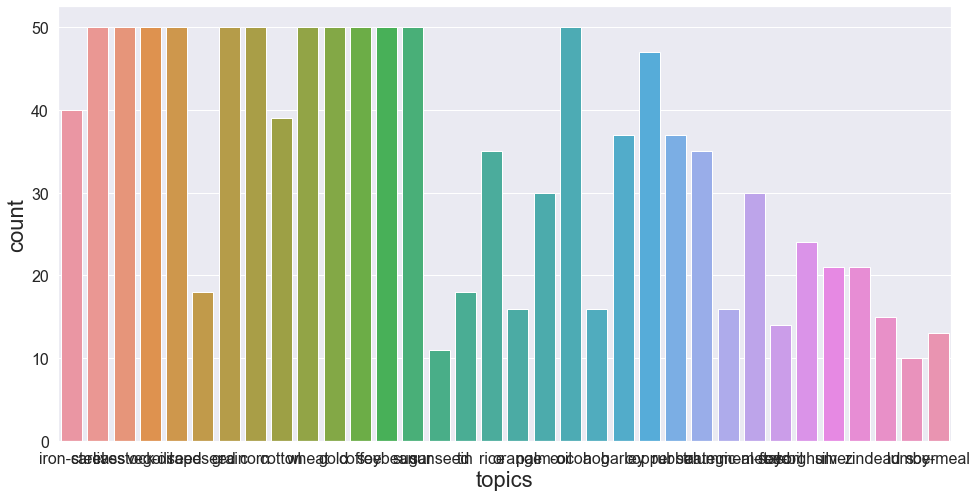

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
params = {'axes.labelsize': 22,
          'axes.titlesize': 25,
          'xtick.labelsize':16,
          'ytick.labelsize':16
         }
# sns.set_theme(style="darkgrid")
# titanic = sns.load_dataset("commodity")
# fig, ax = plt.subplots(figsize=(20, 10))

plt.rcParams.update(params)
ax = sns.countplot(x="topics", data=fewshot_train)
plt.show()